In [ ]:
import pandas as pd
import io
from google.colab import files

file_path = '/content/steam.csv'

df = pd.read_csv(file_path)

print("데이터 로드 성공!")
print(f"총 데이터 개수: {len(df)}개")

df = pd.read_csv(file_path)

print("\n--- 데이터 미리보기 (상위 5개) ---")
display(df.head())

print("\n--- 데이터 정보 요약 ---")
df.info()

데이터 로드 성공!
총 데이터 개수: 27075개

--- 데이터 미리보기 (상위 5개) ---


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99



--- 데이터 정보 요약 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            270

In [ ]:
# name: 게임명, genres: 장르, price: 가격, average_playtime: 평균 플레이시간
# positive/negative_ratings: 평점 계산용
selected_cols = ['name', 'genres', 'price', 'positive_ratings', 'negative_ratings', 'average_playtime']
df_clean = df[selected_cols].copy()

# 총 리뷰 수 (total_reviews)
# 흥행의 척도(얼마나 많은 사람이 평가했는가)
df_clean['total_reviews'] = df_clean['positive_ratings'] + df_clean['negative_ratings']

# 평점(0 ~ 100점 만점 기준)
# 공식: 긍정리뷰 / (긍정 + 부정) * 100
df_clean['rating'] = (df_clean['positive_ratings'] / df_clean['total_reviews']) * 100
df_clean['rating'] = df_clean['rating'].fillna(0) # NaN 값을 0으로 대체

print("--- 전처리 후 데이터 미리보기 ---")
display(df_clean.head())

# 기초 통계 확인 (가격, 평점 등이 정상 범위인지 확인)
print("\n--- 기초 통계 요약 ---")
display(df_clean[['price', 'total_reviews', 'rating']].describe())

--- 전처리 후 데이터 미리보기 ---


,name,genres,price,positive_ratings,negative_ratings,average_playtime,total_reviews,rating
0,Counter-Strike,Action,7.19,124534,3339,17612,127873,97.388815
1,Team Fortress Classic,Action,3.99,3318,633,277,3951,83.978740
2,Day of Defeat,Action,3.99,3416,398,187,3814,89.564761
3,Deathmatch Classic,Action,3.99,1273,267,258,1540,82.662338
4,Half-Life: Opposing Force,Action,3.99,5250,288,624,5538,94.799567



--- 기초 통계 요약 ---


,price,total_reviews,rating
count,27075.000000,2.707500e+04,27075.000000
mean,6.078193,1.211586e+03,71.447792
std,7.874922,2.242909e+04,23.359421
min,0.000000,1.000000e+00,0.000000
25%,1.690000,1.000000e+01,58.333333
50%,3.990000,3.600000e+01,76.033058
75%,7.190000,1.760000e+02,89.390531
max,421.990000,3.046717e+06,100.000000


In [ ]:
# 1. 장르 데이터가 없는 행 제거 (혹시 모르니 안전장치)
df_clean = df_clean.dropna(subset=['genres'])

# 2. 세미콜론(;)으로 묶인 장르를 리스트로 변환
# 예: "Action;Indie" -> ["Action", "Indie"]
df_clean['genres'] = df_clean['genres'].str.split(';')

# 3. 리스트를 개별 행으로 폭발(Explode)시키기
# 판다스의 explode 함수는 리스트의 요소를 각각의 행으로 분리해줍니다.
df_exploded = df_clean.explode('genres')

# 4. 결과 확인
print(f"변환 전 데이터 개수: {len(df_clean)}")
print(f"변환 후 데이터 개수: {len(df_exploded)}")

print("\n--- 장르 분리 후 데이터 미리보기 ---")
display(df_exploded[['name', 'genres', 'price', 'rating']].head(10))

# 5. 어떤 장르가 가장 많은지 확인 (Top 10)
print("\n--- 가장 많은 장르 Top 10 ---")
print(df_exploded['genres'].value_counts().head(10))

변환 전 데이터 개수: 27075
변환 후 데이터 개수: 76462

--- 장르 분리 후 데이터 미리보기 ---


,name,genres,price,rating
0,Counter-Strike,Action,7.19,97.388815
1,Team Fortress Classic,Action,3.99,83.978740
2,Day of Defeat,Action,3.99,89.564761
3,Deathmatch Classic,Action,3.99,82.662338
4,Half-Life: Opposing Force,Action,3.99,94.799567
5,Ricochet,Action,3.99,80.127833
6,Half-Life,Action,7.19,96.187836
7,Counter-Strike: Condition Zero,Action,7.19,89.387123
8,Half-Life: Blue Shift,Action,3.99,90.099010
9,Half-Life 2,Action,7.19,96.560060



--- 가장 많은 장르 Top 10 ---
genres
Indie           19421
Action          11903
Casual          10210
Adventure       10032
Strategy         5247
Simulation       5194
RPG              4311
Early Access     2954
Free to Play     1704
Sports           1322
Name: count, dtype: int64


/tmp/ipython-input-3884054221.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genres', y='rating', data=df_top_genres, palette="Set3")


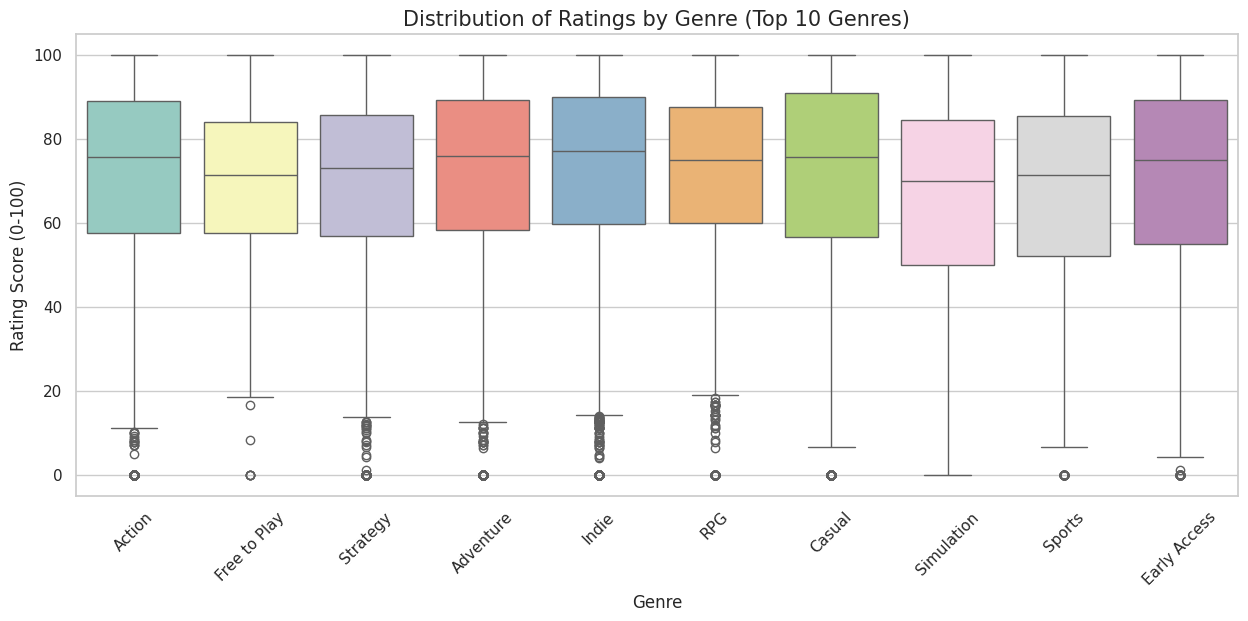

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화

# 1. 게임 수가 가장 많은 상위 10개 장르 선정
top_genres = df_exploded['genres'].value_counts().head(10).index
df_top_genres = df_exploded[df_exploded['genres'].isin(top_genres)]

# 2. 그래프 스타일 설정
plt.figure(figsize=(15, 6))
sns.set_theme(style="whitegrid")

#X축: 장르, Y축: 평점
sns.boxplot(x='genres', y='rating', data=df_top_genres, palette="Set3")

plt.title('Distribution of Ratings by Genre (Top 10 Genres)', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rating Score (0-100)', fontsize=12)
plt.xticks(rotation=45)

plt.show()

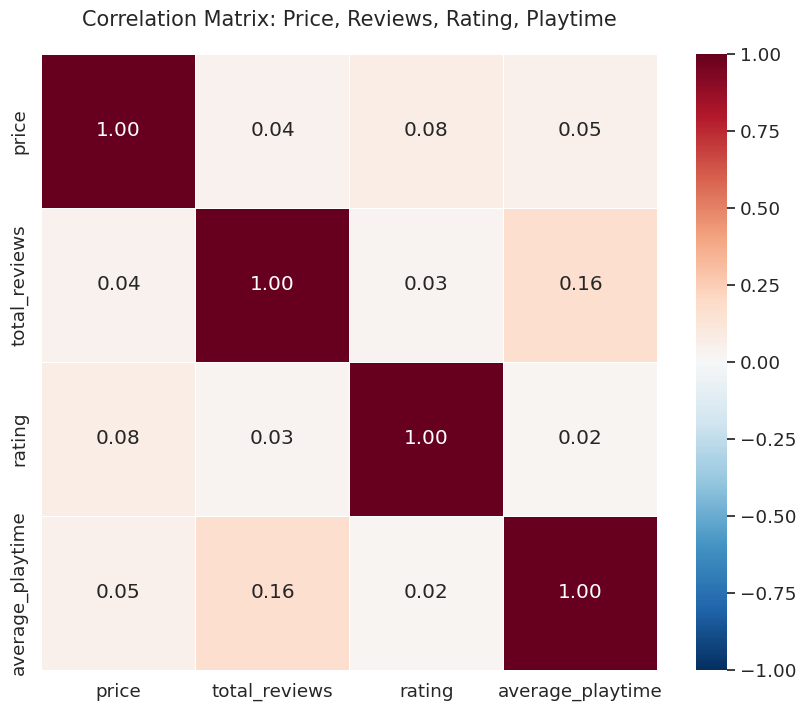

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# price: 가격
# total_reviews: 리뷰 수 (인기도/노출도)
# rating: 평점 (게임성)
# average_playtime: 플레이 타임 (볼륨)
corr_cols = ['price', 'total_reviews', 'rating', 'average_playtime']

correlation_matrix = df_clean[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)

heatmap = sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='RdBu_r',
            vmin=-1, vmax=1,
            square=True,
            linewidths=.5)

plt.title('Correlation Matrix: Price, Reviews, Rating, Playtime', fontsize=15, pad=20)
plt.show()

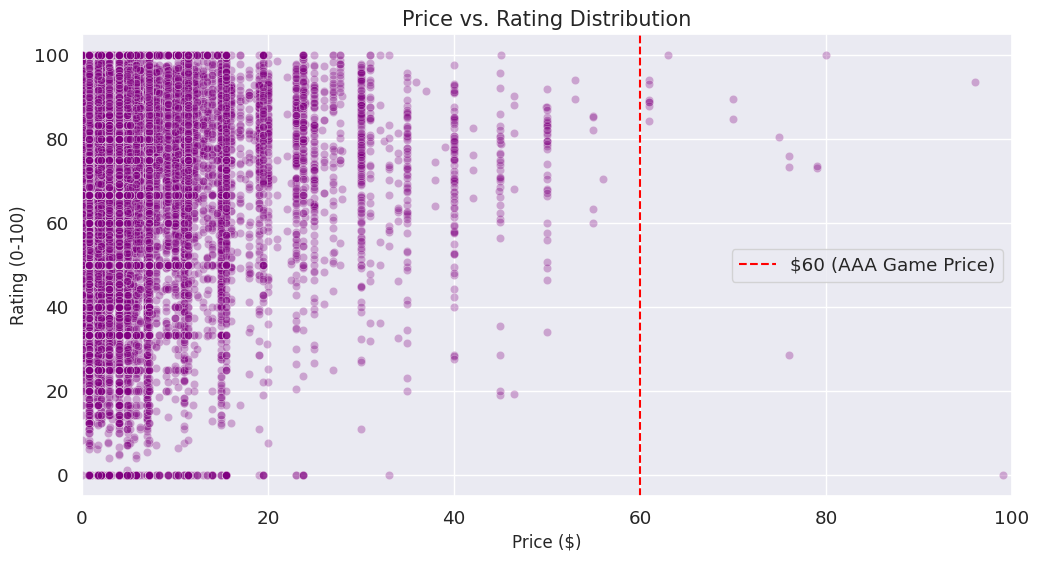

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# 1. 산점도 그리기
# x축: 가격, y축: 평점
# alpha=0.3: 점을 투명하게 해서 데이터가 뭉쳐 있는 곳을 진하게 표시
sns.scatterplot(x='price', y='rating', data=df_clean, alpha=0.3, color='purple')

# 2. 가독성을 위한 보조선 및 설정
plt.axvline(x=60, color='red', linestyle='--', label='$60 (AAA Game Price)') # 60달러 선 표시
plt.title('Price vs. Rating Distribution', fontsize=15)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Rating (0-100)', fontsize=12)
plt.legend()

# 3. 가격이 너무 비싼 이상치(예: 400달러) 때문에 그래프가 찌그러지는 것 방지
plt.xlim(0, 100) # 100달러 이하 게임만 확대해서 보기

plt.show()

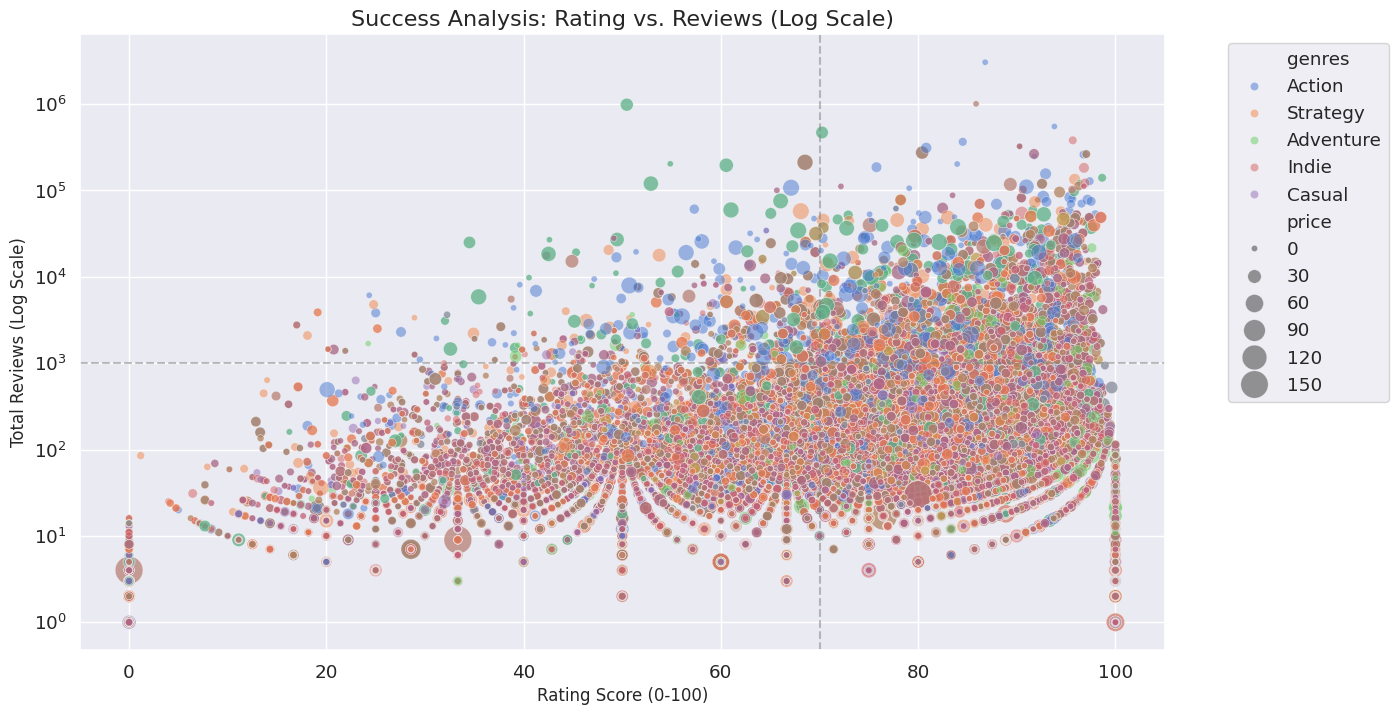

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 상위 5개 장르만 추출 (그래프가 너무 지저분해지는 것 방지)
top_5_genres = df_exploded['genres'].value_counts().head(5).index
df_bubble = df_exploded[df_exploded['genres'].isin(top_5_genres)]

# 2. 그래프 그리기
plt.figure(figsize=(14, 8))

# hue=장르(색상), size=가격(점 크기)
sns.scatterplot(data=df_bubble,
                x='rating',
                y='total_reviews',
                hue='genres',
                size='price',
                sizes=(20, 400), # 점 크기 범위 (최소, 최대)
                alpha=0.5,       # 투명도 (점들이 겹치니까)
                palette='muted')

# 3. Y축을 로그 스케일로 변환 (중요!)
# 리뷰 10개와 1000개의 차이를 시각적으로 비슷하게 보정해줌
plt.yscale('log')

# 4. 기준선 긋기 (4분면 분석을 위해)
plt.axvline(x=70, color='gray', linestyle='--', alpha=0.5) # 평점 70점(수작 기준)
plt.axhline(y=1000, color='gray', linestyle='--', alpha=0.5) # 리뷰 1000개(흥행 기준)

plt.title('Success Analysis: Rating vs. Reviews (Log Scale)', fontsize=16)
plt.xlabel('Rating Score (0-100)', fontsize=12)
plt.ylabel('Total Reviews (Log Scale)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # 범례를 그래프 밖으로

plt.show()